# Netflix Case Study

### # Problem Statement:- 
    
Netflix is a subscription-based streaming service headquartered in the United States, offering on-demand video content over the internet.We want to use this data to help Netflix figure out what kinds of shows and movies to make and how to grow their
business in different countries. We'll look at things like how many movies come out each year, compare TV shows to movies, figure out the best time to release TV shows, check out the actorsand directors, and see what kinds of content are available globally. The main goal is to give Netflix practical advice based on the data so they can make better decisions about what to show and where to expand their business.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('netflix.csv')


In [3]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### # Information about the data :

In [4]:
print("The total columns in the data are : ")
df.columns

The total columns in the data are : 


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
print('Information about the data is as follows : ')
df.info()

Information about the data is as follows : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


 Insights : 
 
1.The dataset contains information on 8807 entries with 12 columns

2.The columns director, cast, country, date_added, rating, and duration have some missing
values, suggesting potential areas for data imputation or handling.

3.The release_year column is of type int64, indicating it contains numerical data representing the
release year. Other columns are of type object, suggesting they contain textual or categorical
information.


In [6]:
# Shape of the data
print("Shape of the data:", df.shape)
print()


Shape of the data: (8807, 12)



In [7]:
# Data types
print("Data types:\n", df.dtypes)
# There are 8807 rows distributed among the 12 distinct columns.

Data types:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [8]:
# Statistical summary
print("Statistical summary  :\n", df.describe())

Statistical summary  :
        release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


### # Non-graphical Analysis

In [9]:
# Non-Graphical Analysis
# Value counts for categorical attributes
print("Value counts for 'Type':\n", df['type'].value_counts())
print()
print("Value counts for 'Rating':\n", df['rating'].value_counts())

Value counts for 'Type':
 Movie      6131
TV Show    2676
Name: type, dtype: int64

Value counts for 'Rating':
 TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64


In [10]:
dfn = df
dfn.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
# Split and explode 'Listed_in' column in-place
dfn['listed_in'] = dfn['listed_in'].str.split(', ')
dfn = dfn.explode('listed_in')
# Split and explode 'Country' column in-place
dfn['country'] = dfn['country'].str.split(', ')
dfn = dfn.explode('country')
dfn

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [13]:
# Unique attributes in different columns
print("Unique directors:\n", dfn['director'].unique())
print()
print("Unique genres:\n", dfn['listed_in'].unique())
print()
print("Value counts for 'country':\n", dfn['country'].unique())

Unique directors:
 ['Kirsten Johnson' nan 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']

Unique genres:
 ['Documentaries' 'International TV Shows' 'TV Dramas' 'TV Mysteries'
 'Crime TV Shows' 'TV Action & Adventure' 'Docuseries' 'Reality TV'
 'Romantic TV Shows' 'TV Comedies' 'TV Horror' 'Children & Family Movies'
 'Dramas' 'Independent Movies' 'International Movies' 'British TV Shows'
 'Comedies' 'Spanish-Language TV Shows' 'Thrillers' 'Romantic Movies'
 'Music & Musicals' 'Horror Movies' 'Sci-Fi & Fantasy' 'TV Thrillers'
 "Kids' TV" 'Action & Adventure' 'TV Sci-Fi & Fantasy' 'Classic Movies'
 'Anime Features' 'Sports Movies' 'Anime Series' 'Korean TV Shows'
 'Science & Nature TV' 'Teen TV Shows' 'Cult Movies' 'TV Shows'
 'Faith & Spirituality' 'LGBTQ Movies' 'Stand-Up Comedy' 'Movies'
 'Stand-Up Comedy & Talk Shows' 'Classic & Cult TV']

Value counts for 'country':
 ['United States' 'South Africa' nan 'India' 'Ghana' 'Burkina Faso'
 'United Kingdom' 'Germany'

In [14]:
# Unique counts for 'director'
director_counts = dfn['director'].value_counts()
print("Unique directors and their counts:\n", director_counts)
print()

Unique directors and their counts:
 Youssef Chahine        46
Cathy Garcia-Molina    37
Martin Scorsese        36
Lars von Trier         33
Steven Spielberg       32
                       ..
Eddie Rosas             1
Vir Das                 1
Lee Daniels             1
Emma Hatherley          1
Kirsten Johnson         1
Name: director, Length: 4528, dtype: int64



In [15]:
# Unique counts for 'listed_in'
genres_counts = dfn['listed_in'].value_counts()
print("Unique genres and their counts:\n", genres_counts)
print()


Unique genres and their counts:
 International Movies            3509
Dramas                          3199
Comedies                        1981
International TV Shows          1465
Action & Adventure              1182
Documentaries                   1116
Independent Movies              1040
TV Dramas                        852
Children & Family Movies         845
Thrillers                        806
Romantic Movies                  722
TV Comedies                      630
Kids' TV                         596
Crime TV Shows                   541
Horror Movies                    458
Docuseries                       436
Music & Musicals                 429
Romantic TV Shows                384
Sci-Fi & Fantasy                 380
Stand-Up Comedy                  344
British TV Shows                 306
Reality TV                       270
Sports Movies                    265
TV Action & Adventure            204
Spanish-Language TV Shows        202
Anime Series                     192
Korea

In [16]:
# Unique counts for 'country'
country_counts = dfn['country'].value_counts()
print("Unique countries and their counts:\n", country_counts)
dfn['country'] = dfn['country'].str.replace('United States,', 'United States')

Unique countries and their counts:
 United States     6779
India             2804
United Kingdom    1779
France             916
Canada             877
                  ... 
Somalia              1
Sudan                1
Nicaragua            1
Uganda               1
United States,       1
Name: country, Length: 127, dtype: int64


In [17]:
# Unique counts for 'director'
director_counts= dfn['director'].value_counts()
total_directors= len(dfn['director'].unique())
print("Unique directors and their counts:\n", director_counts)
print("Total unique directors:", total_directors)
print()

# Unique counts for 'listed_in'
genres_counts = dfn['listed_in'].value_counts()
total_genres= len(dfn['listed_in'].unique())
print("Unique genres and their counts:\n", genres_counts)
print("Total unique genres:", total_genres)
print()

# Unique counts for 'country'
country_counts = dfn['country'].value_counts()
total_countries = len(dfn['country'].unique())
print("Unique countries and their counts:\n", country_counts)
print("Total unique countries:", total_countries)
print()
# Unique counts for 'type'
type_counts = dfn['type'].value_counts()
total_type = len(dfn['type'].unique())
print("Unique types and their counts:\n", type_counts)
print("Total unique type:", total_type)

Unique directors and their counts:
 Youssef Chahine        46
Cathy Garcia-Molina    37
Martin Scorsese        36
Lars von Trier         33
Steven Spielberg       32
                       ..
Eddie Rosas             1
Vir Das                 1
Lee Daniels             1
Emma Hatherley          1
Kirsten Johnson         1
Name: director, Length: 4528, dtype: int64
Total unique directors: 4529

Unique genres and their counts:
 International Movies            3509
Dramas                          3199
Comedies                        1981
International TV Shows          1465
Action & Adventure              1182
Documentaries                   1116
Independent Movies              1040
TV Dramas                        852
Children & Family Movies         845
Thrillers                        806
Romantic Movies                  722
TV Comedies                      630
Kids' TV                         596
Crime TV Shows                   541
Horror Movies                    458
Docuseries       

###  # Missing Values : 

In [18]:
print("Missing Values")
df.isnull().sum()

Missing Values


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [19]:
print("Summary of statistics data: ")
df.describe()


Summary of statistics data: 


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Date added

In [20]:

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [22]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [26]:
import pandas as pd

# function to create seperate columns out of duration column to return duration minute

def split_duration(row):
    if row['type'] == 'Movie':
        return int(row['duration'].split(' ')[0]) if pd.notna(row['duration']) else None
    elif row['type'] == 'TV Show':
        return int(row['duration'].split(' ')[0]) if (pd.notna(row['duration']) and 'S' in row['duration']) else None

# Applying the split_duration function to create a new column 'duration_min'
df['duration_min'] = df.apply(split_duration, axis=1)

# For TV Shows, extracting the number of seasons
df['num_seasons'] = df.apply(lambda row: int(row['duration'].split(' ')[0]) if (pd.notna(row['duration']) and 'S' in row['duration']) else None, axis=1)

# Set duration_min to 0 for TV Shows
df.loc[df['type'] == 'TV Show', 'duration_min'] = 0
df[['show_id', 'type', 'title','duration', 'duration_min', 'num_seasons']]

,show_id,type,title,duration,duration_min,num_seasons
0,s1,Movie,Dick Johnson Is Dead,90 min,90.0,NaN
1,s2,TV Show,Blood & Water,2 Seasons,0.0,2.0
2,s3,TV Show,Ganglands,1 Season,0.0,1.0
3,s4,TV Show,Jailbirds New Orleans,1 Season,0.0,1.0
4,s5,TV Show,Kota Factory,2 Seasons,0.0,2.0
...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,158 min,158.0,NaN
8803,s8804,TV Show,Zombie Dumb,2 Seasons,0.0,2.0
8804,s8805,Movie,Zombieland,88 min,88.0,NaN
8805,s8806,Movie,Zoom,88 min,88.0,NaN


In [27]:
df[['duration_min', 'num_seasons']].describe()

,duration_min,num_seasons
count,8804.000000,2676.000000
mean,69.310427,1.764948
std,51.527657,1.582752
min,0.000000,1.000000
25%,0.000000,1.000000
50%,88.000000,1.000000
75%,106.000000,2.000000
max,312.000000,17.000000


## # Graphical Analysis : 

<Axes: xlabel='duration_min', ylabel='Count'>

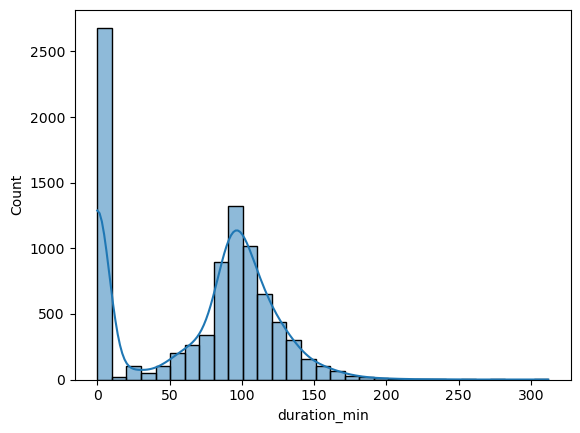

In [28]:
sns.histplot(df['duration_min'], kde=True)


Here , we can see that the average movie time is at around of 100 minutes.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73]),
 [Text(0, 0, '1925'),
  Text(1, 0, '1942'),
  Text(2, 0, '1943'),
  Text(3, 0, '1944'),
  Text(4, 0, '1945'),
  Text(5, 0, '1946'),
  Text(6, 0, '1947'),
  Text(7, 0, '1954'),
  Text(8, 0, '1955'),
  Text(9, 0, '1956'),
  Text(10, 0, '1958'),
  Text(11, 0, '1959'),
  Text(12, 0, '1960'),
  Text(13, 0, '1961'),
  Text(14, 0, '1962'),
  Text(15, 0, '1963'),
  Text(16, 0, '1964'),
  Text(17, 0, '1965'),
  Text(18, 0, '1966'),
  Text(19, 0, '1967'),
  Text(20, 0, '1968'),
  Text(21, 0, '1969'),
  Text(22, 0, '1970'),
  Text(23, 0, '1971'),
  Text(24, 0, '1972'),
  Text(25, 0, '1973'),
  Text(26, 0, '1974'),
  Text(27, 0, '1975'),
  Text(28, 0, '1976'),
  Tex

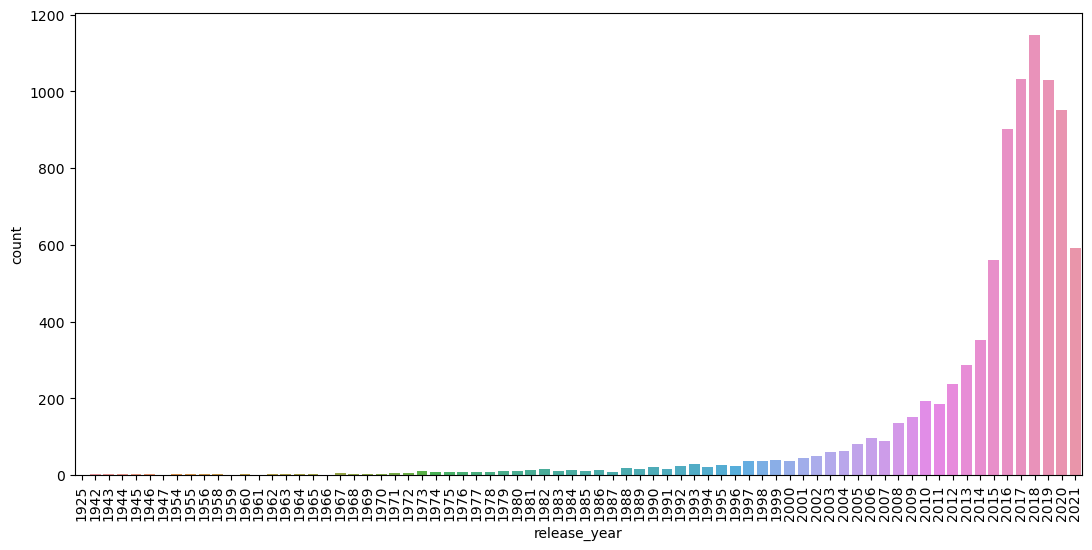

In [33]:
# countplot for the release_year
plt.figure(figsize=(13,6))
sns.countplot(data=df,x='release_year')
plt.xticks(rotation='vertical')

The count of movies / tvshows is highest in the year "2018"

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  duration_min  8804 non-null   float64       
 13  num_seasons   2676 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 963.4+ KB


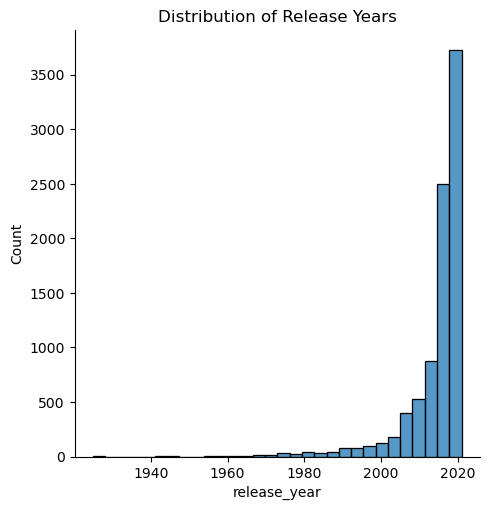

In [35]:
# Distplot for the release_year
sns.displot(df['release_year'], kde=False, bins=30)
plt.title('Distribution of Release Years')
plt.show()

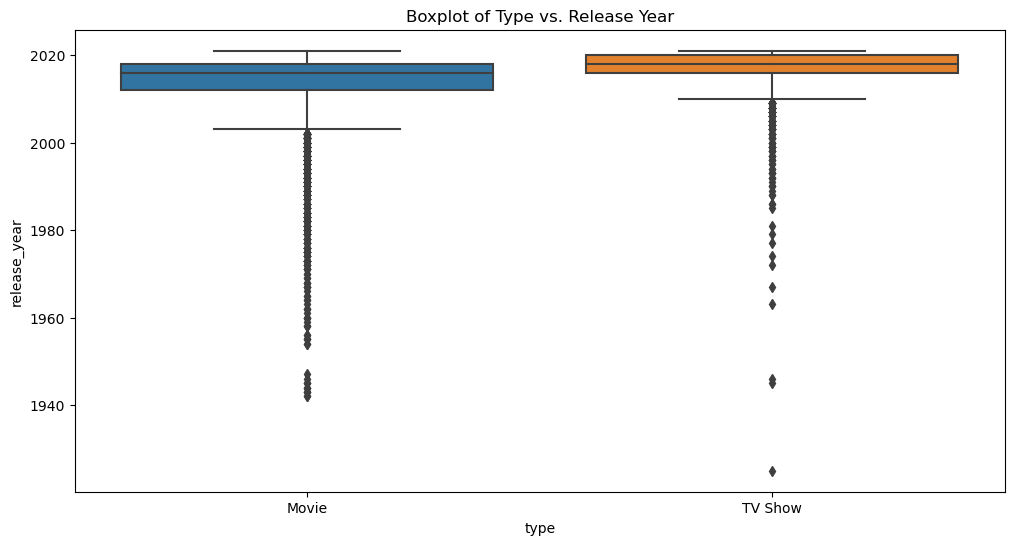

In [36]:
# Boxplot for 'type' vs. 'rating'
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='release_year', data=df)
plt.title('Boxplot of Type vs. Release Year')
plt.show()


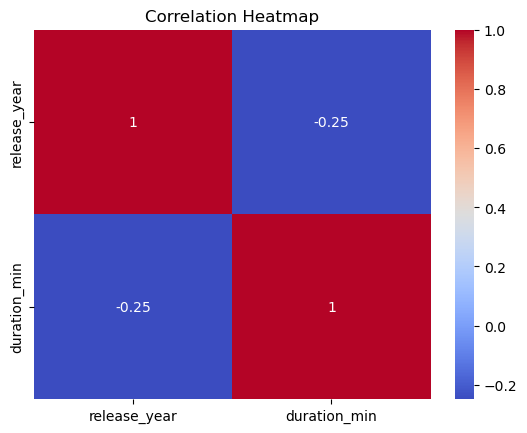

In [37]:
# Create a correlation matrix
corr_matrix = df[['release_year', 'duration_min']].corr()
# Heatmap for correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

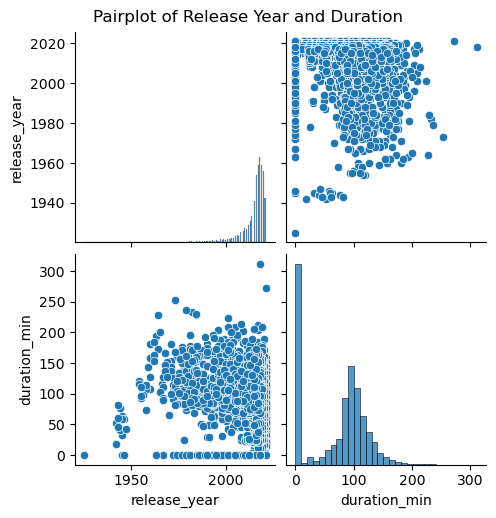

In [38]:
# Pairplot for release_year and duration_min
sns.pairplot(df[['release_year', 'duration_min']].dropna())
plt.suptitle('Pairplot of Release Year and Duration', y=1.02)
plt.show()

In [40]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display missing values counts for each column
print("Missing Values:\n", missing_values)

Missing Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
duration_min       3
num_seasons     6131
dtype: int64


In [41]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

Text(0.5, 1.02, 'Countplot of the Movie and TV Shows')

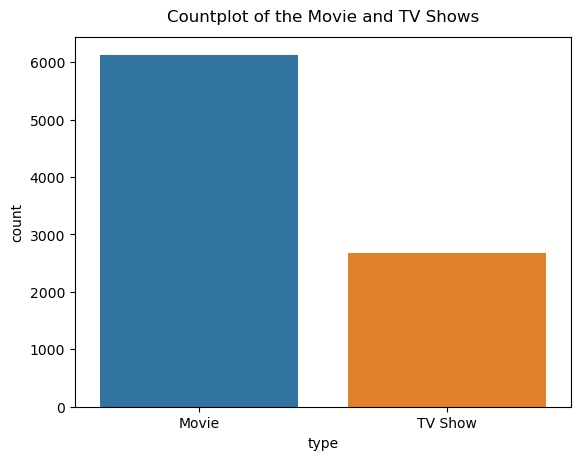

In [46]:
sns.countplot(data=df,x='type')
plt.title('Countplot of the Movie and TV Shows', y=1.02)

In [47]:
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_min,num_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",90.0,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",0.0,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,0.0,1.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",0.0,1.0


In [48]:
# Unique counts for 'listed_in'
genres_counts = df['listed_in'].value_counts()
country_counts = df['country'].value_counts()
# Select top ten genres
top_ten_genres = genres_counts.head(10)
top_ten_countries = country_counts.head(10)


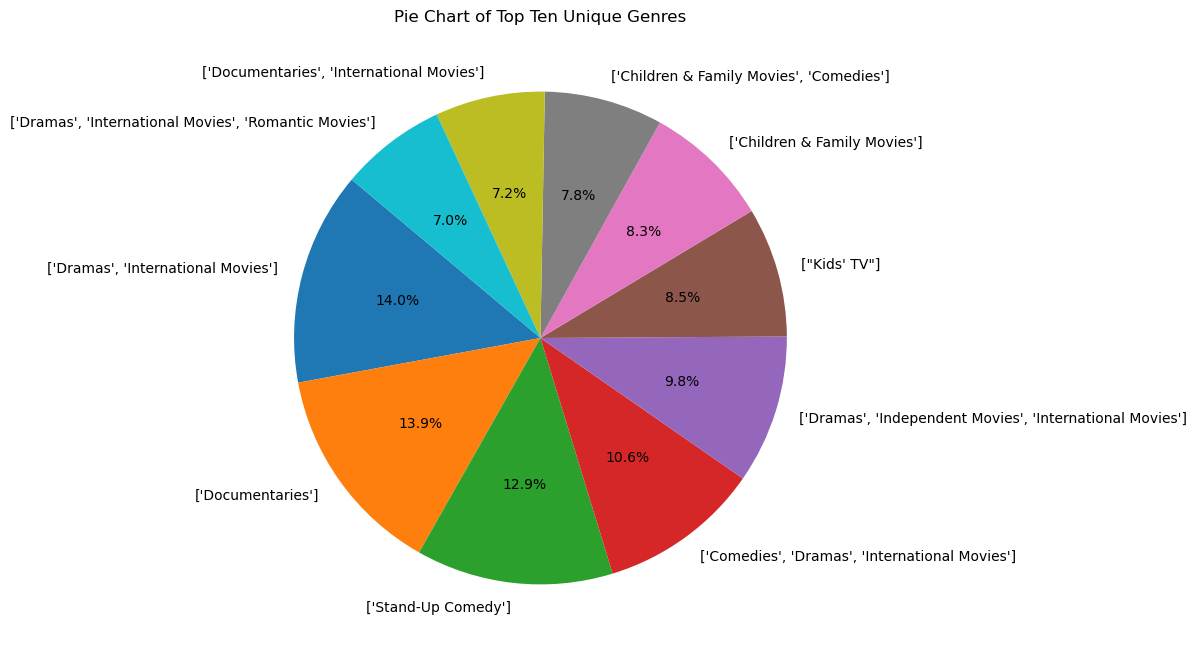

In [56]:
# Create a pie chart for the top ten genres
plt.figure(figsize=(10, 8))
plt.pie(top_ten_genres, labels=top_ten_genres.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Top Ten Unique Genres')
plt.show()


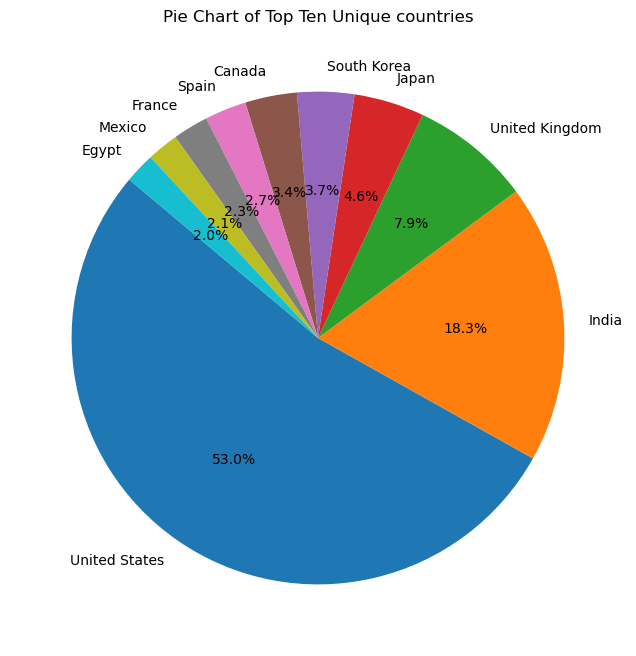

In [57]:
# Create a pie chart for the top ten countries
plt.figure(figsize=(10, 8))
plt.pie(top_ten_countries, labels=top_ten_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Top Ten Unique countries')
plt.show()

Among all the countries ,  US, India &  UK are making huge number of  movies.

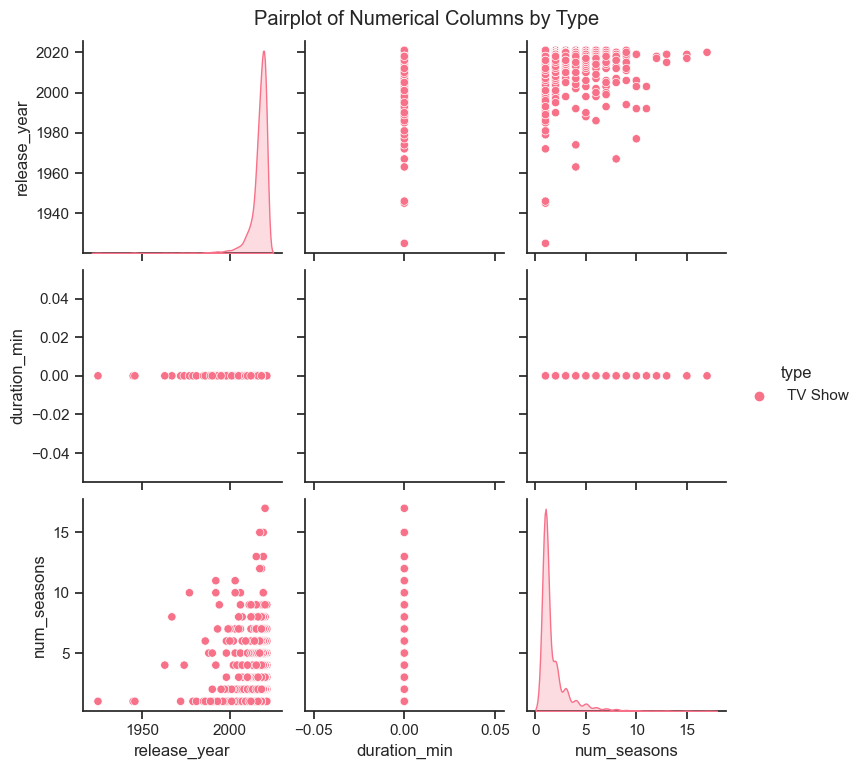

In [60]:
pairplot_cols = ['release_year', 'duration_min', 'num_seasons', 'type']

# Dropping rows with missing values for the pairplot
df_pairplot = df[pairplot_cols].dropna()

# Creating pairplot
sns.set(style="ticks")
sns.pairplot(df_pairplot, hue='type', palette='husl', markers=["o", "s"], diag_kind="kde")
plt.suptitle("Pairplot of Numerical Columns by Type", y=1.02)
plt.show()


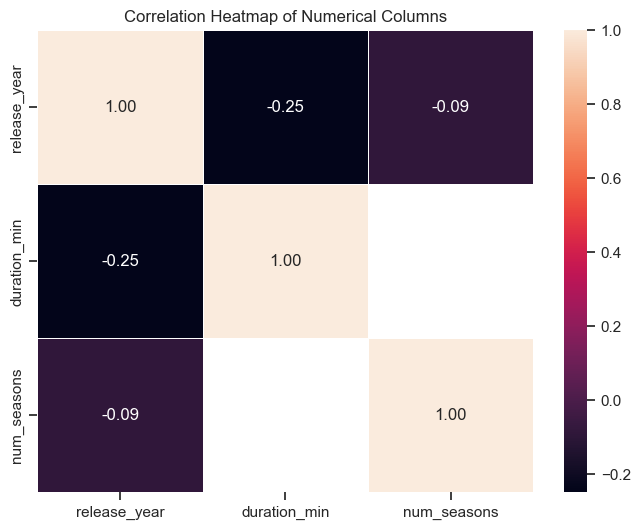

In [61]:
# Selecting relevant numerical columns for the heatmap
numerical_cols = ['release_year', 'duration_min', 'num_seasons']
# Creating a correlation matrix
correlation_matrix = df[numerical_cols].corr()
# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

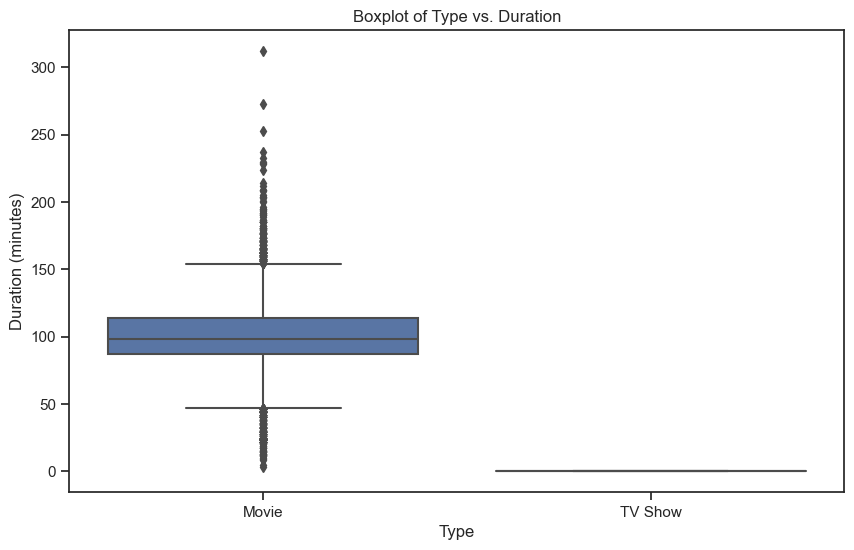

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='duration_min', data=df)
plt.title('Boxplot of Type vs. Duration')
plt.xlabel('Type')
plt.ylabel('Duration (minutes)')
plt.show()

In [63]:
df['days_to_addition'] = (pd.to_datetime(df['date_added']) - pd.to_datetime(df['release_year'], format='%Y')).dt.days

# Find the mode of the differences
mode_days_to_addition = df['days_to_addition'].mode().values[0]
print(f"The mode of days between release and addition to Netflix is: {mode_days_to_addition}")


The mode of days between release and addition to Netflix is: 334.0


- The mode of the time difference between a movie's release and its addition to Netflix is 334 days.



- This indicates that, on average, movies are added to the Netflix platform around 334 days after their initial release.



- Utilizing this information can assist in strategic planning for optimal timing when adding
  movies to Netflix, enhances viewer engagement and overall platform performance.

In [67]:
tv_shows_by_country = df[df['type'] == 'TV Show'].groupby('country')['title'].nunique()
top_10_tv_show_countries = tv_shows_by_country.sort_values(ascending=False).head(10)
print(top_10_tv_show_countries)

country
United States     760
United Kingdom    213
Japan             169
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Australia          48
Spain              48
Name: title, dtype: int64


-  The United States is the leading contributor to TV show production on Netflix, with a count of 760 unique titles.
-  The United Kingdom and Japan also play significant roles in producing TV shows, with 213 and 169 unique titles.
-  South Korea, India, and Taiwan demonstrate considerable contributions, each with more than 50 unique TV show titles.
-  Canada, France, Australia, and Spain complete the top 10 countries in terms of TV showproduction for Netflix, each with varying but noteworthy numbers of unique titles

In [68]:
df['release_month'] = df['date_added'].dt.month

In [69]:
tv_shows_df = df[df['type'] == 'TV Show']
movies_df = df[df['type'] == 'Movie']

In [70]:
tv_shows_monthly_count = tv_shows_df.groupby('release_month').size()
movies_monthly_count = movies_df.groupby('release_month').size()

In [71]:
best_month_tv_shows = tv_shows_monthly_count.idxmax()
best_month_movies = movies_monthly_count.idxmax()

In [72]:
print(f"Best Month for TV Shows: {best_month_tv_shows}")
print(f"Best Month for Movies: {best_month_movies}")

Best Month for TV Shows: 12.0
Best Month for Movies: 7.0


#### For TV Shows -

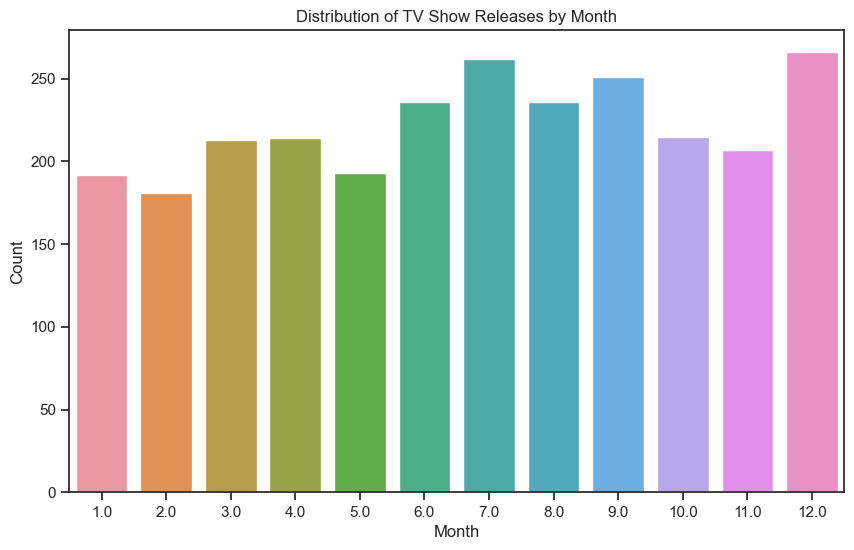

In [75]:
# FOR TV SHOWS - 

plt.figure(figsize=(10, 6))
sns.countplot(x='release_month', data=df[df['type'] == 'TV Show'])
plt.title('Distribution of TV Show Releases by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [76]:
tv_shows_monthly_count

release_month
1.0     192
2.0     181
3.0     213
4.0     214
5.0     193
6.0     236
7.0     262
8.0     236
9.0     251
10.0    215
11.0    207
12.0    266
dtype: int64

#### For Movies -

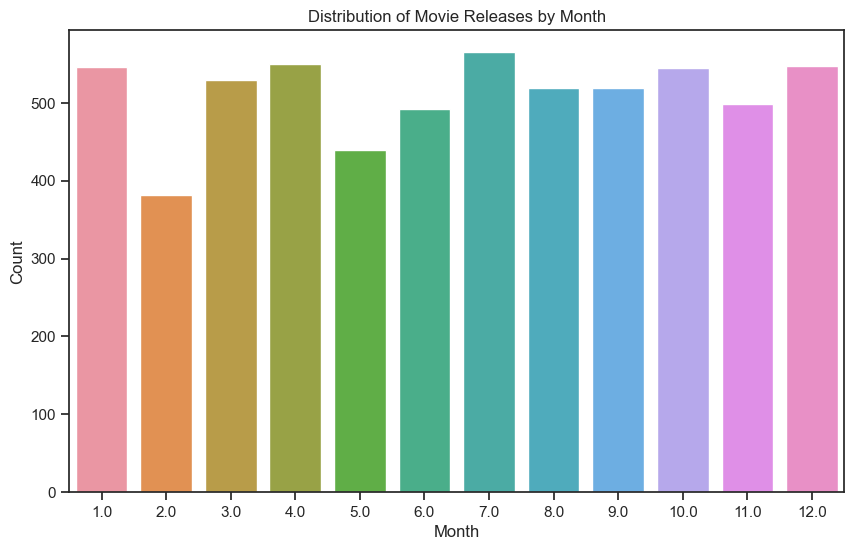

In [77]:
# FOR MOVIES -

plt.figure(figsize=(10, 6))
sns.countplot(x='release_month', data=df[df['type'] == 'Movie'])
plt.title('Distribution of Movie Releases by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [78]:
movies_monthly_count

release_month
1.0     546
2.0     382
3.0     529
4.0     550
5.0     439
6.0     492
7.0     565
8.0     519
9.0     519
10.0    545
11.0    498
12.0    547
dtype: int64

The analysis reveals that-
-  December (12th Month) is the most favorable month for releasing TV shows, as it has the highest count of TV show releases.
-  For movies, the data suggests that July (7th Month) is the best month for releases, considering it has the highest count of movie releases.

In [81]:
print("Finding which column has nesting issues : ")
df[df.cast.apply(lambda x: "," in str(x))]

Finding which column has nesting issues : 


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_min,num_seasons,days_to_addition,release_month
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",0.0,2.0,266.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,0.0,1.0,266.0,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...,0.0,2.0,266.0,9.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"[TV Dramas, TV Horror, TV Mysteries]",The arrival of a charismatic young priest brin...,0.0,1.0,266.0,9.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...,91.0,NaN,266.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"[Dramas, International Movies, Thrillers]",Recovering alcoholic Talal wakes up inside a s...,96.0,NaN,433.0,3.0
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a...",158.0,NaN,4706.0,11.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...,88.0,NaN,3956.0,11.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero...",88.0,NaN,5123.0,1.0


In [82]:
castdata=df[['title','cast']]
castdata.head()

,title,cast
0,Dick Johnson Is Dead,NaN
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,Jailbirds New Orleans,NaN
4,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."


In [83]:
def splitstring(inp):
 return str(inp).split(', ')
castdata['cast']=castdata.cast.apply(splitstring)

In [85]:
castdata=castdata.explode('cast')

In [86]:
top_cast = castdata.groupby('cast')['title'].count().reset_index()
# Sort the DataFrame by the count of titles in descending order
top_cast = top_cast.sort_values(by='title', ascending=False)
# Select the top 10 cast members
top_10_cast = top_cast.head(10)
top_10_cast

,cast,title
36316,nan,825
2833,Anupam Kher,43
30489,Shah Rukh Khan,35
16697,Julie Tejwani,33
24215,Naseeruddin Shah,32
32591,Takahiro Sakurai,32
28974,Rupa Bhimani,31
25424,Om Puri,30
846,Akshay Kumar,30
35880,Yuki Kaji,29


Analysis shows that -
-  Anupam Kher has the highest count of titles, appearing in 43 different movies or TV shows on Netflix.
-  Shah Rukh Khan is the second most prolific cast member with 35 titles, showcasing hissignificant presence in Netflix content.
-  Julie Tejwani holds the third position with 33 titles, contributing significantly to the Netflix library.
-  Naseeruddin Shah and Takahiro Sakurai share the fourth position, each featuring in 32 titles.
-  Rupa Bhimani secures the fifth spot with 31 titles, making her a notable contributor to Netflix content.
-  Om Puri and Akshay Kumar both have appeared in 30 titles, tying for the sixth position.
-  Yuki Kaji rounds up the top 10 cast members with 29 titles, making him a consistent presence in Netflix productions.


In [87]:
directordata = df[['title','director','rating']]
def splitstring(inp):
 return str(inp).split(', ')
directordata['director']=directordata.director.apply(splitstring)
directordata=directordata.explode('director')

In [91]:
# Grouping by director and counting unique titles
top_directors = directordata.groupby('director')['title'].nunique().sort_values(ascending= False)

# Selecting the top 10 directors
top_10_directors = top_directors.head(10)

# Displaying the result
print(top_10_directors)

director
nan                    2634
Rajiv Chilaka            22
Jan Suter                21
Raúl Campos              19
Suhas Kadav              16
Marcus Raboy             16
Jay Karas                15
Cathy Garcia-Molina      13
Martin Scorsese          12
Youssef Chahine          12
Name: title, dtype: int64


Analysis -

-  Rajiv Chilaka (22 Titles): Leading with the highest count, Rajiv Chilaka has contributed significantly to a diverse range of movies or TV shows.
-  Jan Suter (21 Titles): Jan Suter closely follows with a substantial number of titles, showcasing a consistent involvement in the industry.
-  Raúl Campos (19 Titles): Raúl Campos has made a notable impact with a considerable number of movies or TV shows.

In [92]:
listdata=df[['title','type','listed_in','country']]
listdata.head()

,title,type,listed_in,country
0,Dick Johnson Is Dead,Movie,[Documentaries],United States
1,Blood & Water,TV Show,"[International TV Shows, TV Dramas, TV Mysteries]",South Africa
2,Ganglands,TV Show,"[Crime TV Shows, International TV Shows, TV Ac...",NaN
3,Jailbirds New Orleans,TV Show,"[Docuseries, Reality TV]",NaN
4,Kota Factory,TV Show,"[International TV Shows, Romantic TV Shows, TV...",India


In [94]:
def splitstring(inp):
 return str(inp).split(', ')
listdata['listed_in']=listdata.listed_in.apply(splitstring)
listdata=listdata.explode('listed_in')

In [95]:
# Unique counts for 'listed_in'
genres_counts = listdata['listed_in'].value_counts()
country_counts = listdata['country'].value_counts()
# Select top ten genres
top_ten_genres = genres_counts.head(10)
top_ten_countries = country_counts.head(10)

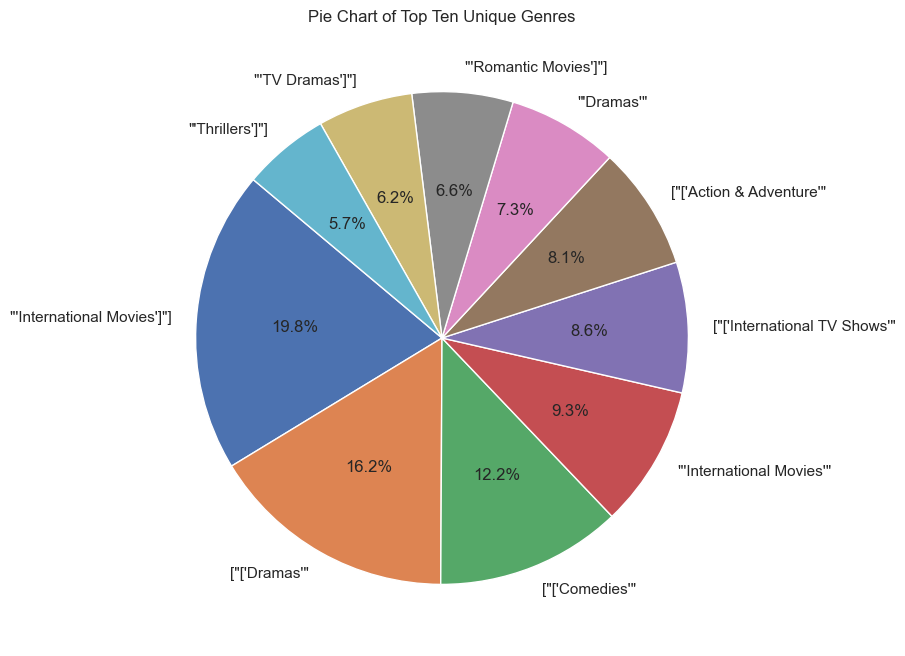

In [96]:
# Creating a pie chart for the top ten genres
plt.figure(figsize=(10, 8))
plt.pie(top_ten_genres, labels=top_ten_genres.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Top Ten Unique Genres')
plt.show()

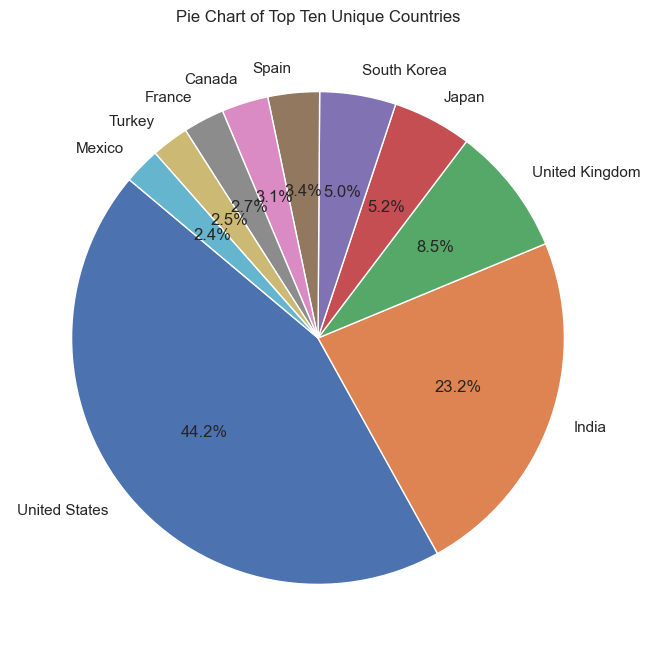

In [98]:
# Creating a pie chart for the top ten countries
plt.figure(figsize=(10, 8))
plt.pie(top_ten_countries, labels=top_ten_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Top Ten Unique Countries')
plt.show()

-  International Movies dominate with 21.7%, showcasing a global audience preference.
-  Dramas at 19.1% signify a diverse range, catering to varied storytelling preferences. 
-  Comedy(13.2%)
- International TV Shows (10.6%), and Documentaries (6.8%) contribute to a wellrounded content library, meeting diverse viewer interests on Netflix

In [102]:
# Assuming listdata is your DataFrame
listdata['listed_in'] = listdata['listed_in'].str.replace(r"[\['\]]", '', regex=True)
top_10_listed_in = listdata['listed_in'].value_counts().head(10)
print(top_10_listed_in)

"International Movies"        2752
"Dramas"                      2427
"Comedies"                    1674
"International TV Shows"      1351
"Documentaries"                869
"Action & Adventure"           859
"TV Dramas"                    763
"Independent Movies"           756
"Children & Family Movies"     641
"Romantic Movies"              616
Name: listed_in, dtype: int64


In [103]:
pivot_table = pd.pivot_table(listdata, index=['country'], columns=['listed_in'], aggfunc='size', fill_value=0)

In [104]:
pivot_table.fillna(0, inplace=True)
# top ten countries based on the sum of genres
top_ten_countries = pivot_table.sum(axis=1).nlargest(10).index
# top ten 'listed_in' genres
top_ten_genres = pivot_table.sum().nlargest(10).index
# top ten countries and top ten 'listed_in' genres
top_ten_pivot_by_genre = pivot_table.loc[top_ten_countries, top_ten_genres]
top_ten_pivot_by_genre = top_ten_pivot_by_genre.astype(int)

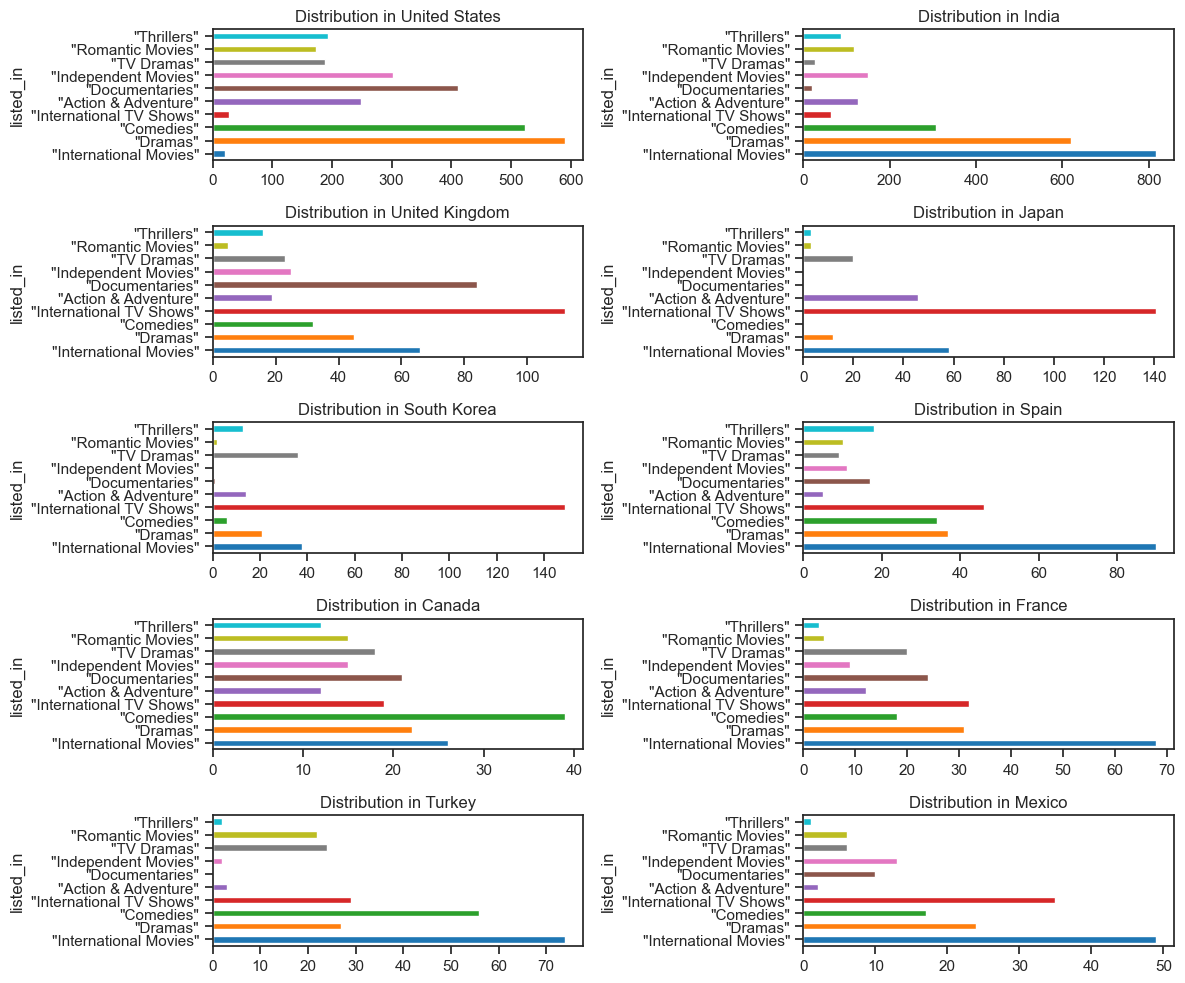

In [106]:
# Plotting a horizontal bar chart
plt.figure(figsize=(12, 10))
for i, country in enumerate(top_ten_countries):
    plt.subplot(5, 2, i + 1)
    top_ten_pivot_by_genre.loc[country].plot(kind='barh', color=plt.cm.tab10.colors)
    plt.title(f'Distribution in {country}')
plt.tight_layout()
plt.show()

In [110]:
countrydata=df[['title','type','country']] 
countrydata.head()

,title,type,country
0,Dick Johnson Is Dead,Movie,United States
1,Blood & Water,TV Show,South Africa
2,Ganglands,TV Show,NaN
3,Jailbirds New Orleans,TV Show,NaN
4,Kota Factory,TV Show,India


In [112]:
def splitstring(inp):
 return str(inp).split(', ')
countrydata['country']=countrydata.country.apply(splitstring)
countrydata=countrydata.explode('country')
countrydata

,title,type,country
0,Dick Johnson Is Dead,Movie,['United States']
1,Blood & Water,TV Show,['South Africa']
2,Ganglands,TV Show,['nan']
3,Jailbirds New Orleans,TV Show,['nan']
4,Kota Factory,TV Show,['India']
...,...,...,...
8802,Zodiac,Movie,['United States']
8803,Zombie Dumb,TV Show,['nan']
8804,Zombieland,Movie,['United States']
8805,Zoom,Movie,['United States']


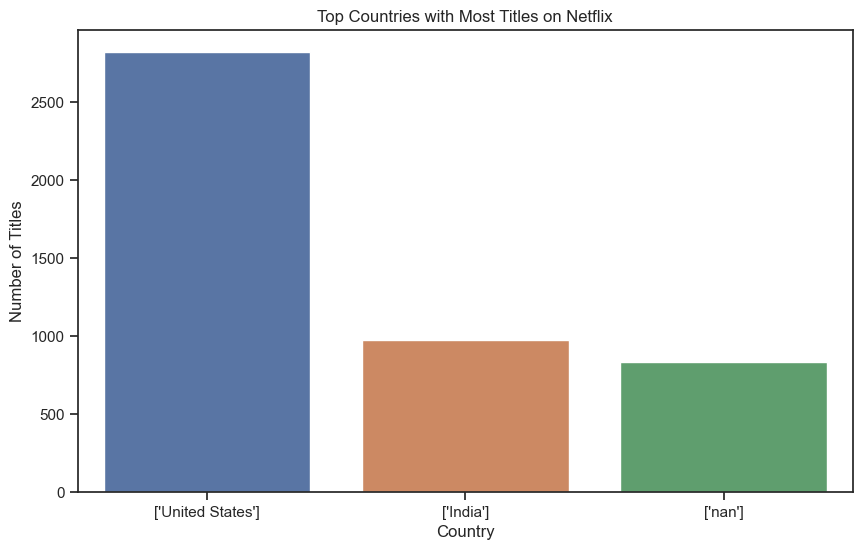

In [113]:
# Group by the 'country' column and count the number of titles in each country
country_title_counts = countrydata['country'].value_counts().head(3)
# Plotting the results using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=country_title_counts.index, y=country_title_counts.values)
plt.title('Top Countries with Most Titles on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

<Figure size 1500x800 with 0 Axes>

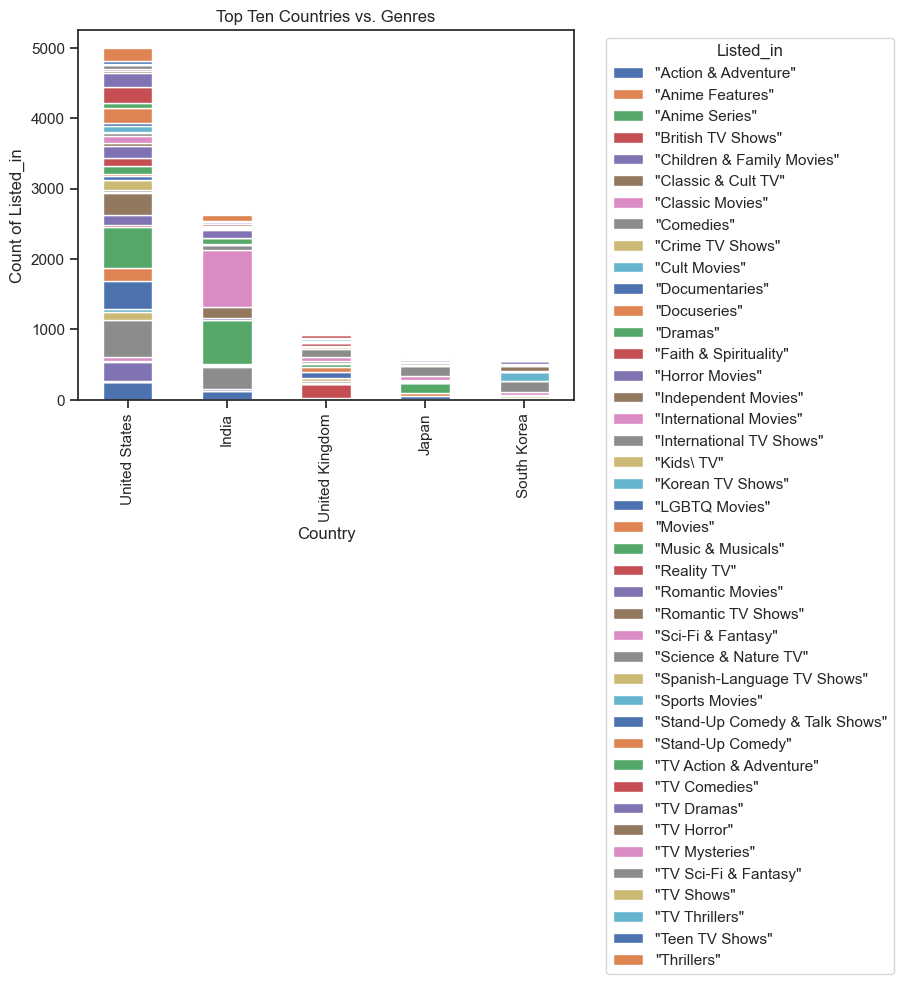

In [120]:
pivot_table.fillna(0, inplace=True)
# Get the top ten countries based on the sum of genres
top_ten_countries = pivot_table.sum(axis=1).nlargest(5).index
top_ten_pivot = pivot_table.loc[top_ten_countries]
# Plotting a bar chart for the top ten countries
plt.figure(figsize=(15, 8))
top_ten_pivot.plot(kind='bar', stacked=True)
plt.title('Top Ten Countries vs. Genres')
plt.xlabel('Country')
plt.ylabel('Count of Listed_in')
plt.xticks(rotation=90)
plt.legend(title='Listed_in', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

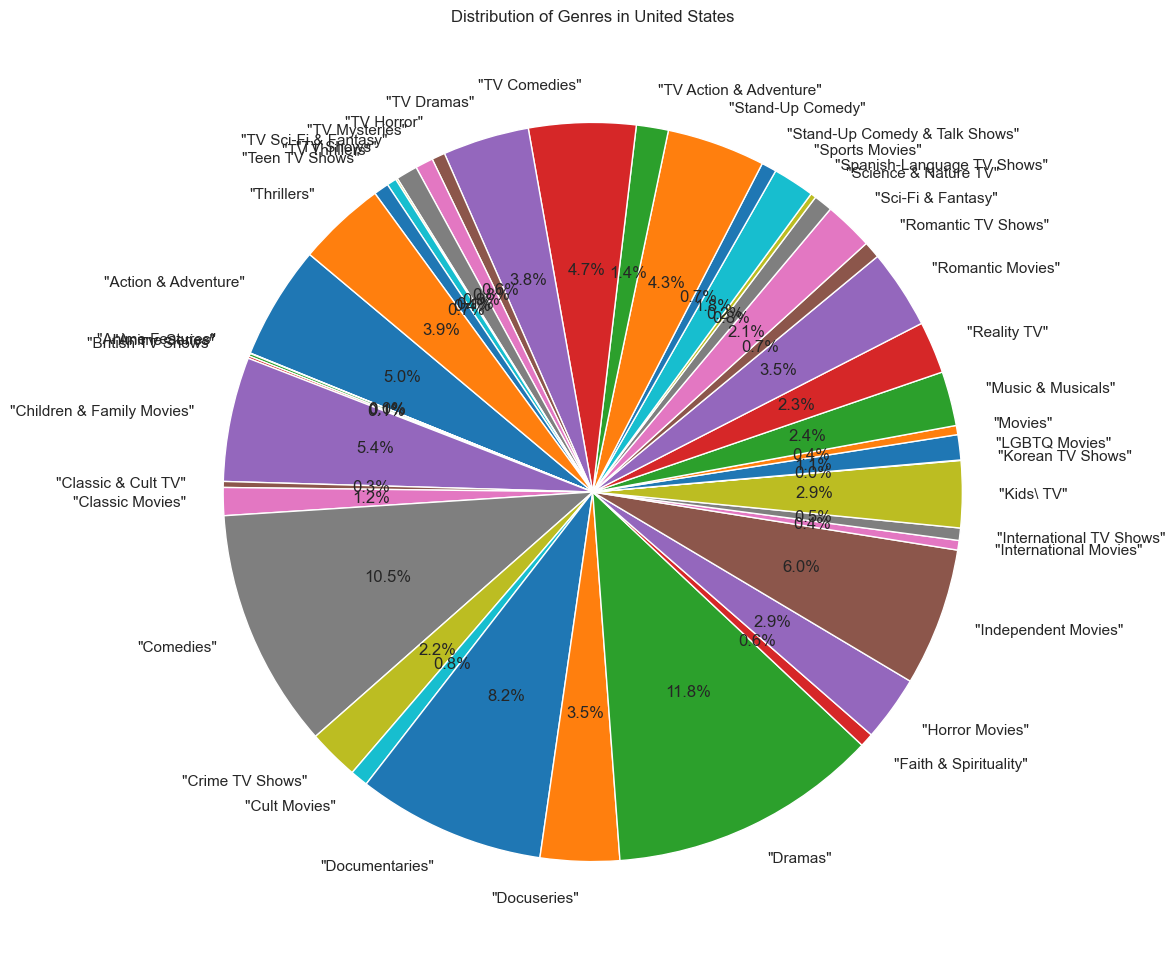

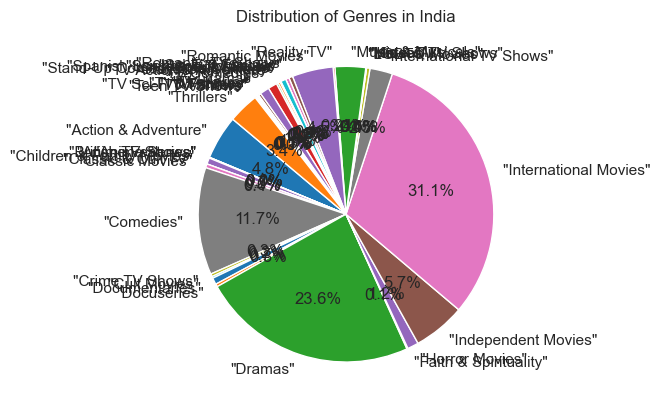

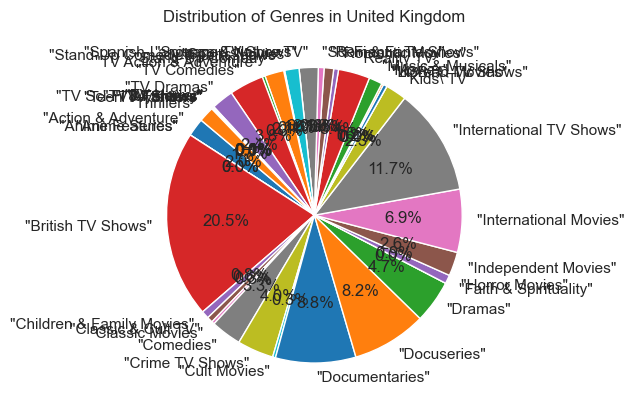

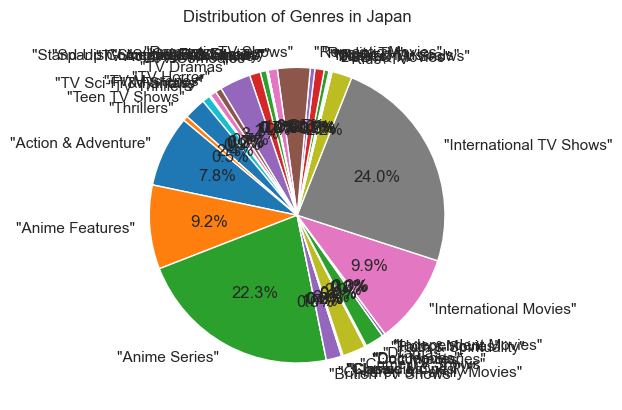

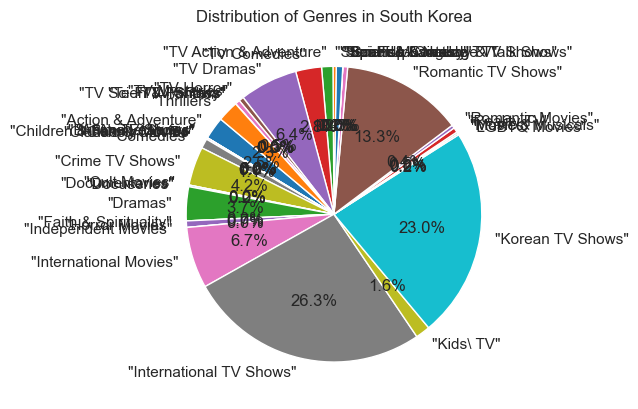

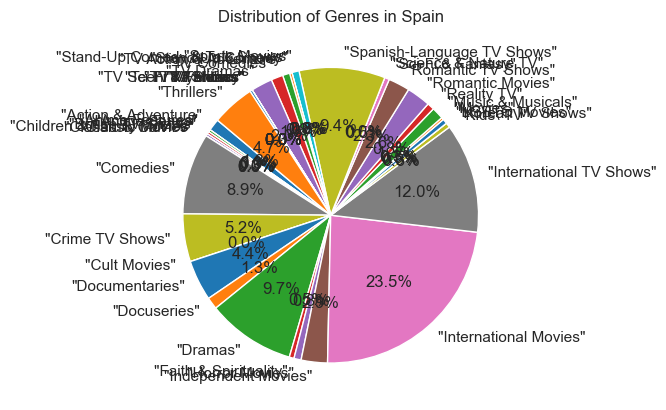

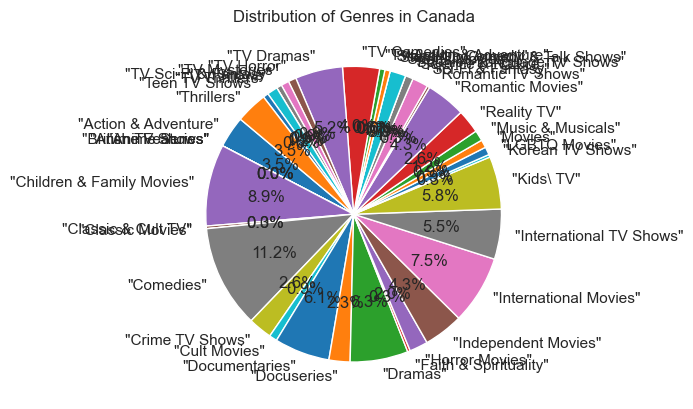

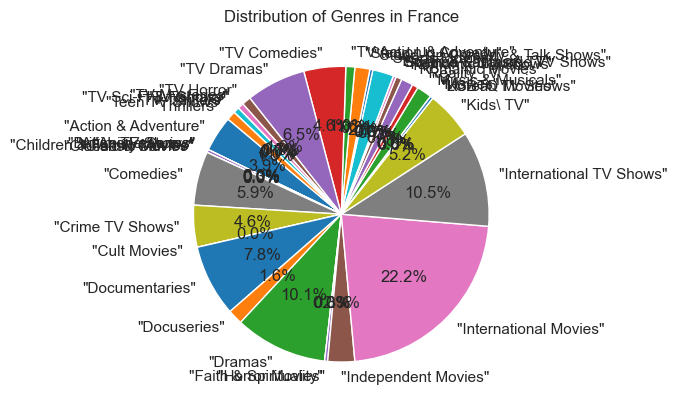

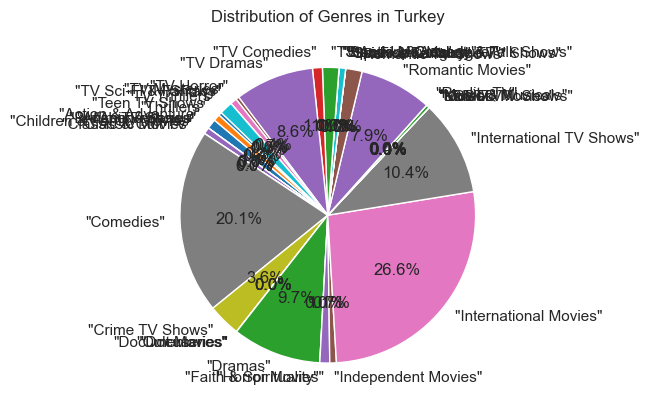

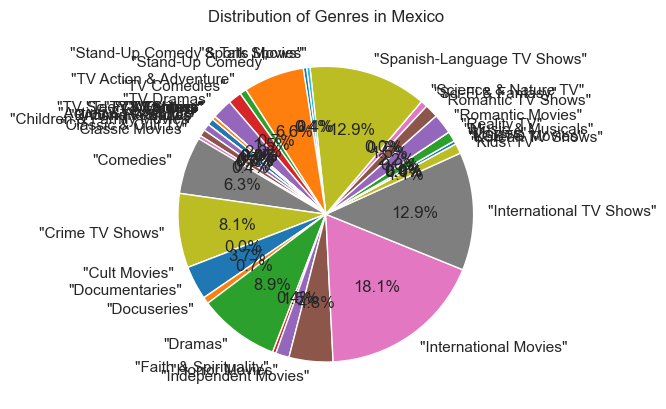

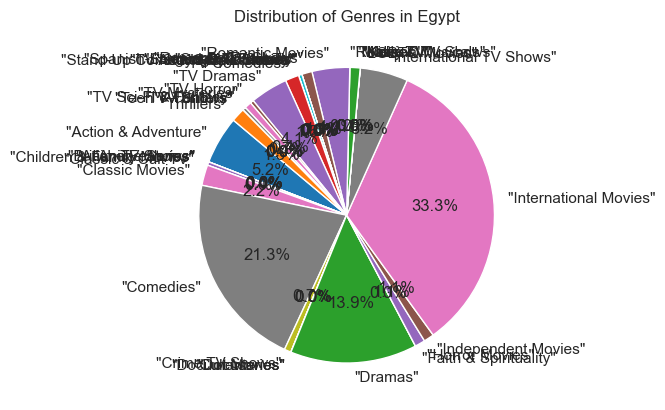

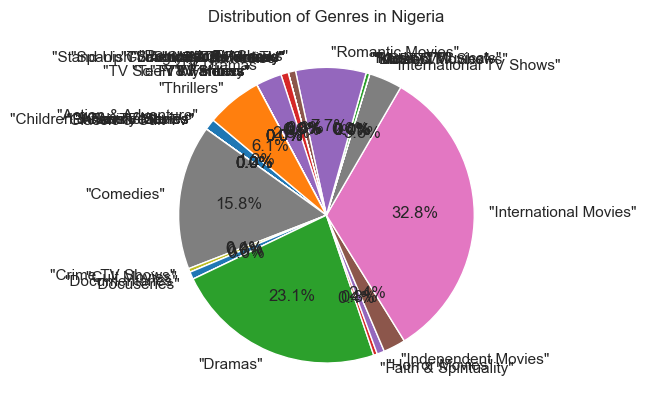

In [121]:
top_ten_countries = pivot_table.sum(axis=1).nlargest(12).index
top_ten_pivot = pivot_table.loc[top_ten_countries]
# Plotting a pie chart for the distribution of 'listed_in' genres in the top ten countries
plt.figure(figsize=(12, 12))
colors = plt.cm.tab10.colors
for country in top_ten_countries:
 plt.pie(top_ten_pivot.loc[country], labels=top_ten_pivot.columns, autopct='%1.1f%%', startangle=140, colors=colors)
 plt.title(f'Distribution of Genres in {country}')
 plt.show()

# Business Insights : 

Business insights:-

United States dominates with the highest number of titles (3689), indicating its significant influence on the platform's content.

best cast: Anupam Kher and Shah Rukh Khan lead with the highest number of titles, suggesting their popularity and potential draw for viewers.


Director Influence: Directors like Rajiv Chilaka and Jan Suter contribute substantially, showcasing the impact of specific directors on content creation.


Release Timing Strategy: December is the best month for TV show releases, while July is optimal for movies. This insight can guide content scheduling for better visibility.


Weekly Strategies: For TV shows, Week 12 is most productive, while Week 27 is ideal for movie releases. Planning releases around these weeks can enhance audience engagement.


Genre Distribution: Understanding the genre distribution (e.g., International Movies, Dramas) allows targeted content creation to cater to audience preferences.


Time Lag Between Release and Availability: The mode time lag of 334 days from release to availability on Netflix indicates a pattern that could influence acquisition strategies.


TV Show Season Duration: The prevalence of TV shows with 2 seasons suggests viewers prefer this structure, influencing decisions on creating additional seasons or planning new content.


Month-wise Content Strategy: Consider focusing on content creation in December for TV shows and July for movies, aligning with peak viewership times.


Top Genres for Diversification: Exploring diverse genres, especially those popular among users (e.g., International Movies, Dramas), can lead to a well-rounded content library.


#  Recommendation : 

Expand Global Content: The United States in content, Netflix can strategically focus on
expanding its library with more diverse international titles to cater to a global audience.

Invest in Star Talent: Recognizing the popularity of actors like Anupam Kher and Shah Rukh
Khan, Netflix could explore collaborations and exclusive deals with such stars to enhance the
platform's appeal.

Directorial Collaborations: Establishing partnerships with prolific directors like Rajiv Chilaka and
Jan Suter can contribute to a consistent and engaging stream of content, attracting viewers with
unique directorial styles.

Strategic Release Planning: Utilizing the insights on optimal release months and weeks, Netflix
can strategically plan the launch of its original content to maximize viewership and capitalize on
peak engagement periods.

Content Acquisition Strategy: Understanding the time lag between movie releases and their
availability on Netflix can guide the platform's acquisition strategy, ensuring a timely addition of
popular titles to the library.

Tailor content creation strategies based on popular genres, emphasizing genres like
International Movies and Dramas that resonate well with the audience.

In [122]:
pip install pandoc

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
                                              0.0/127.0 kB ? eta -:--:--
     ----------------------                  71.7/127.0 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 127.0/127.0 kB 1.5 MB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33290 sha256=742d70d95e50f8360fe90664fa7d26b38f622ac29c880d74ea0f5552f9f240d2
  Stored in directory: c:\users\pranali\appdata\local\pip\cache\wheels\76\27\c2\c26175310aadcb8741b77657a1bb49c50cc7d4cdbf9eee0005
Successfully built pandoc
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
